In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.optimize import basinhopping
from pyswarm import pso
from scipy.optimize import minimize
from scipy.optimize import curve_fit

In [2]:

# Approximant
def rational(x, a, b, c, d):
    return (a*x + b) / (x**2 + c*x + d)

# MSE function to minimize
def loss(params, Y, X, func):
    loss = np.mean((func(X, *params) - Y)**2)
    return loss

In [3]:
# Desired error
error = 0.001

## Define and plot goal function

In [4]:
X = np.array([3*i/1000 for i in range(1000)])
    
f = lambda x: 1/(x**2-3*x+2)
f_x = map(f, X)

Y = np.zeros(1000)
for i, f_val in enumerate(f_x):
    if abs(f_val) > 100:
        Y[i] = np.sign(f_val)*100 + np.random.normal(0, 1)
    else:
        Y[i] = f_val + np.random.normal(0, 1)


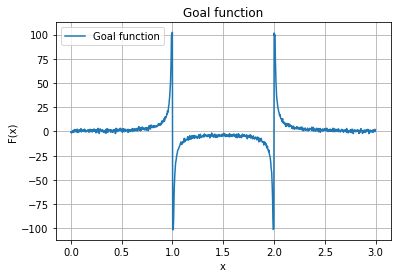

In [5]:
fig, ax = plt.subplots()
plt.grid()


ax.set_xlabel("x")
ax.set_ylabel("F(x)")
ax.set_title(f"Goal function")

plt.plot(X, Y, label="Goal function")

plt.legend(loc="upper left")

# Simulated Annealing

In [6]:
init_guess = np.random.uniform(size = 4)

anneal_res = basinhopping(loss, init_guess, T=0.5,
                          minimizer_kwargs={"args": (Y, X, rational)},
                          niter=1000, niter_success=200)
print(anneal_res)


                        fun: 135.55328874294895
 lowest_optimization_result:       fun: 135.55328874294895
 hess_inv: array([[ 8.90365177e-03, -8.91002180e-03, -1.73679222e-06,
         1.43796259e-06],
       [-8.91002180e-03,  8.91652812e-03,  1.47263999e-06,
        -1.17349188e-06],
       [-1.73679226e-06,  1.47264003e-06,  1.07338677e-06,
        -1.07367358e-06],
       [ 1.43796263e-06, -1.17349192e-06, -1.07367358e-06,
         1.07397815e-06]])
      jac: array([  -3.69689751,   -3.71577644, 1031.78956795, 1032.84629631])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 922
      nit: 61
     njev: 152
   status: 2
  success: False
        x: array([-0.99867506,  0.99918976, -2.00097425,  1.00099004])
                    message: ['success condition satisfied']
      minimization_failures: 206
                       nfev: 179189
                        nit: 211
                       njev: 29483
                          x: array([-0.99867

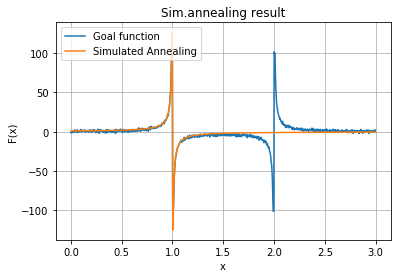

In [7]:
fig, ax = plt.subplots()
plt.grid()


ax.set_xlabel("x")
ax.set_ylabel("F(x)")
ax.set_title(f"Sim.annealing result")

plt.plot(X, Y, label="Goal function")
plt.plot(X, rational(X, *anneal_res.x), label="Simulated Annealing")
plt.legend(loc="upper left")



# Swarm optimization

In [8]:
swarm, _ = pso(loss, [-4]*4, [4]*4, args=(Y, X, rational), 
               swarmsize=150, omega=0.55, phip=0.4, 
               phig=0.65, maxiter=1000, minstep=1e-8, 
               minfunc=1e-8)
print(f"Optimized {swarm}")

Stopping search: maximum iterations reached --> 1000
Optimized [-1.42095913  1.42273758 -2.00401739  1.00406432]


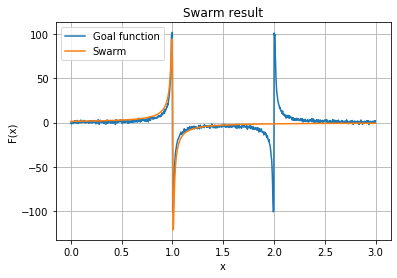

In [9]:
fig, ax = plt.subplots()
plt.grid()


ax.set_xlabel("x")
ax.set_ylabel("F(x)")
ax.set_title(f"Swarm result")

plt.plot(X, Y, label="Goal function")
plt.plot(X, rational(X, *swarm), label="Swarm" )
plt.legend(loc="upper left")



# Nelder-Mead

In [10]:
%time nm = minimize(loss, init_guess, args=(Y, X, rational), method="Nelder-Mead", tol=error, options={"maxiter":1000, "adaptive":True})
print(nm)

CPU times: user 15.8 ms, sys: 127 µs, total: 16 ms
Wall time: 14.9 ms
 final_simplex: (array([[-3.01707458,  3.01914534, -2.00110999,  1.00169045],
       [-3.01702457,  3.01928937, -2.00113708,  1.00172009],
       [-3.0170199 ,  3.01920849, -2.00109773,  1.00168514],
       [-3.01707732,  3.01920001, -2.00111447,  1.00169595],
       [-3.0171682 ,  3.01937398, -2.00123602,  1.00182108]]), array([232.93055651, 232.9311903 , 232.93140936, 232.93144764,
       232.9315463 ]))
           fun: 232.93055650699412
       message: 'Optimization terminated successfully.'
          nfev: 305
           nit: 166
        status: 0
       success: True
             x: array([-3.01707458,  3.01914534, -2.00110999,  1.00169045])


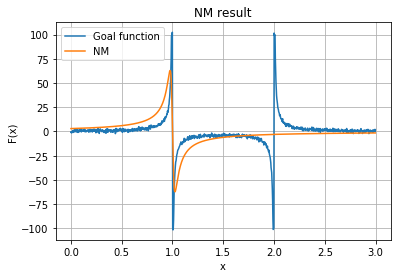

In [11]:
fig, ax = plt.subplots()
plt.grid()


ax.set_xlabel("x")
ax.set_ylabel("F(x)")
ax.set_title(f"NM result")

plt.plot(X, Y, label="Goal function")
plt.plot(X, rational(X, *nm.x), label="NM" )
plt.legend(loc="upper left")



# Levenberg-Marquardt

In [12]:
lm = curve_fit(rational, X, Y, method="lm")
print(lm)

(array([-0.99987947,  1.00038162, -2.00092238,  1.00093818]), array([[ 2.00170178e-03, -2.00247590e-03, -1.05593397e-06,
         9.96781924e-07],
       [-2.00247590e-03,  2.00328602e-03,  9.80463019e-07,
        -9.21298550e-07],
       [-1.05593400e-06,  9.80463051e-07,  2.93898898e-07,
        -2.93812076e-07],
       [ 9.96781956e-07, -9.21298582e-07, -2.93812076e-07,
         2.93728843e-07]]))


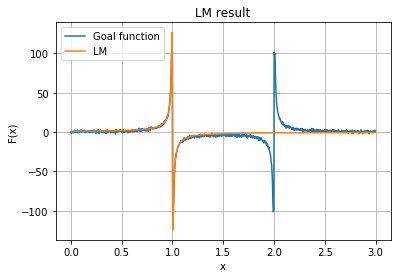

In [13]:
fig, ax = plt.subplots()
plt.grid()


ax.set_xlabel("x")
ax.set_ylabel("F(x)")
ax.set_title(f"LM result")

plt.plot(X, Y, label="Goal function")
plt.plot(X, rational(X, *lm[0]), label="LM" )
plt.legend(loc="upper left")



# Results

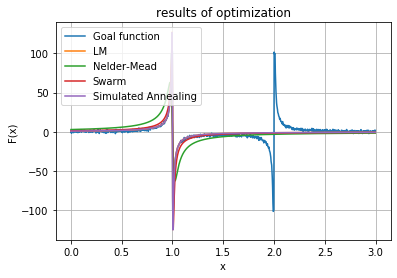

In [14]:
fig, ax = plt.subplots()
plt.grid()


ax.set_xlabel("x")
ax.set_ylabel("F(x)")
ax.set_title(f"results of optimization")

plt.plot(X, Y, label="Goal function")

plt.plot(X, rational(X, *lm[0]), label="LM" )
plt.plot(X, rational(X, *nm.x), label="Nelder-Mead" )
plt.plot(X, rational(X, *swarm), label="Swarm" )
plt.plot(X, rational(X, *anneal_res.x), label="Simulated Annealing" )

plt.legend(loc="upper left")